# Goodreads Book Reviews Analysis - Numerical Data Exploration

## Project Overview
This project aims to analyze **Goodreads book reviews**, focusing on **1-star ratings** to understand patterns in harsh reviews. The analysis is divided into two parts:
1. **Numerical Data Analysis** (Current Stage) - Examining numerical factors such as star ratings, review counts, and genre distributions.
2. **Natural Language Processing (NLP) Analysis** (Next Stage) - Exploring book descriptions and text reviews to identify sentiment patterns.

## Adding dataset with text reviews

In [ ]:
import pandas as pd
import json
import gzip

chunk_size= 10000
chunks= []

with gzip.open ("./Data/goodreads_reviews_dedup.json.gz", "rt", encoding="utf-8") as f:
    for i, line in enumerate(f): #read line by line
        chunks.append(json.loads(line)) #convert json to stionf dict

    #every chuck line, process data to write csv
        if (i + 1) % chunk_size == 0:
            df_chunk = pd.DataFrame(chunks)
            df_chunk.to_csv("goodreads_reviews", mode="a", index= False, header = (i < chunk_size))
            chunks = []
        
if chunks:
    df_chunk = pd.DataFrame(chunks)
    df_chunk.to_csv("goodreads_reviews", mode ="a", index=False, header=False) 


In [ ]:
df_reviews = pd.read_csv("goodreads_reviews")

In [ ]:
df_reviews.head()

In [ ]:
df_reviews.info()

In [ ]:
df_reviews['book_id'].duplicated().any()

In [ ]:
import pandas as pd
import json
import gzip

chunk_size= 10000
chunks= []

with gzip.open ("./Data/goodreads_books.json.gz", "rt", encoding="utf-8") as f:
    for i, line in enumerate(f): #read line by line
        chunks.append(json.loads(line)) #convert json to stionf dict
         
    #every chuck line, process data to write csv
        if (i + 1) % chunk_size == 0:
            df_chunk = pd.DataFrame(chunks)
            df_chunk.to_csv("goodreads_books", mode="a", index= False, header = (i < chunk_size))
            chunks = []
        
if chunks:
    df_chunk = pd.DataFrame(chunks)
    df_chunk.to_csv("goodreads_books", mode ="a", index=False, header=False) 

In [ ]:
df_books = pd.read_csv("goodreads_books")

In [ ]:
df_books.head(10)

In [ ]:
df_books.info()

In [ ]:
print(df_books.columns)

In [ ]:
df_merged = df_reviews.merge(df_books, on="book_id", how="inner")

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_merged.head(10)

In [ ]:
print(df_merged.columns)

In [ ]:
df_merged=df_merged.drop(columns=['user_id','date_added','read_at','started_at','date_updated','read_at','kindle_asin','work_id','n_comments','asin','similar_books','series','similar_books','publication_month','publication_day','edition_information','is_ebook'])


In [ ]:
df_merged.info()

In [ ]:
df_merged=df_merged.drop(columns=['format', 'num_pages', 'isbn13', 'link', 'title_without_series'])

In [ ]:
df_merged['review_id'].duplicated().any()

In [ ]:
(df_merged['text_reviews_count']== 0).any()

In [ ]:
df_merged[df_merged['text_reviews_count'] == 0]
#?? maybe outdated text review count

In [ ]:
df_merged[df_merged['rating'] == 0]
#reviews that have text but no star rating was left? I am choosing to leave these out of analysis

In [ ]:
df_merged= df_merged[df_merged['rating'].notna() & (df_merged['rating'] !=0)]

In [ ]:
#for this analysis I will only be focusing on english reviews
#removing nonenglish rows and rows with no text in review_text or description. I dont think this will hurt bc the df is so large
df_merged= df_merged.dropna(subset=['review_text','description'])

In [ ]:
df_merged.head()

In [ ]:
#cleaning popular shelves column
print(df_merged['popular_shelves'].iloc[0])

In [ ]:
#seeing which shelves have the highest counts
import ast
from collections import Counter

#function that extracts shelf names from string lists of the shelf dictionaires
def shelf_names(shelves_str):
    shelves_list = ast.literal_eval(shelves_str) #convert the string to a list of dicts
    if isinstance(shelves_list, list):
        return [shelf['name'] for shelf in shelves_list if 'name' in shelf] #extract 'name' value from each dict if it exists
    return []

shelf_counter = Counter()

In [ ]:
#very large operation (takes about 100 minutes to run)
for row in df_merged['popular_shelves'].dropna():
    shelf_counter.update(shelf_names(row))

print(shelf_counter.most_common(30))

In [ ]:
import random

unique_shelves = list(shelf_counter.keys())
print(f"unique names: {len(unique_shelves)}")

In [ ]:
print(shelf_counter.most_common(1000))

In [ ]:
def normalize_shelf(name):
    return name.strip().lower().replace(" ", "-")

In [ ]:
#Filtering shelf names

In [ ]:
#cleaning the author column
print(df_merged['authors'].iloc[0])

In [ ]:
#there is already a language code column but it's not through. Try lang detect to fill in missing
from langdetect import detect
df_merged['dec']

In [ ]:
#checking for final cleaning steps to slim down dataset futher before splitting  then saving to a csv

In [ ]:
#split df into managable chunks for further analysis

In [ ]:
for star in range(0,6):
    df_star = df_merged[df_merged['rating'] == star]
    df_star.to_csv(f"{star}star_reviews.csv")

In [ ]:
import zipfile
import os

csv_files = ["./Data/1star_reviews.csv"]

zip_path = "./Data/1star_reviews.zip"

with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for file in csv_files:
        arcname = os.path.basename(file)
        zipf.write(file,arcname=arcname)

zip_path

In [ ]:
#assigning them to variables then checking size

df_5star = pd.read_csv("./Data/5star_reviews.csv")
df_5star.info()

In [ ]:
df_4star = pd.read_csv("./Data/4star_reviews.csv")
df_4star.info()

In [ ]:
df_3star = pd.read_csv("./Data/3star_reviews.csv")
df_3star.info()

In [ ]:
df_2star = pd.read_csv("./Data/2star_reviews.csv")
df_2star.info()

In [3]:
import pandas as pd
import json
import gzip
import ast
from collections import Counter

In [1]:
pip install "numpy<2"

Note: you may need to restart the kernel to use updated packages.


In [5]:
df_1star = pd.read_csv("./Data/1star_reviews.csv")
df_1star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419874 entries, 0 to 419873
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          419874 non-null  int64  
 1   book_id             419874 non-null  int64  
 2   review_id           419874 non-null  object 
 3   rating              419874 non-null  int64  
 4   review_text         419874 non-null  object 
 5   n_votes             419874 non-null  int64  
 6   isbn                328665 non-null  object 
 7   text_reviews_count  419874 non-null  float64
 8   country_code        419874 non-null  object 
 9   language_code       340979 non-null  object 
 10  popular_shelves     419874 non-null  object 
 11  average_rating      419874 non-null  float64
 12  description         419874 non-null  object 
 13  authors             419874 non-null  object 
 14  publisher           347484 non-null  object 
 15  publication_year    358879 non-nul

In [6]:
# taking a sample of the smallest rating dataset to test for cleaning
sample_1star= df_1star.sample(10000, random_state=42)

In [7]:
#cleaning popular shelves column
print(sample_1star['popular_shelves'].iloc[0])

[{'count': '587', 'name': 'to-read'}, {'count': '76', 'name': 'romance'}, {'count': '75', 'name': 'diana-palmer'}, {'count': '26', 'name': 'contemporary-romance'}, {'count': '20', 'name': 'currently-reading'}, {'count': '17', 'name': 'harlequin'}, {'count': '14', 'name': 'western'}, {'count': '13', 'name': 'contemporary'}, {'count': '10', 'name': 'long-tall-texans'}, {'count': '10', 'name': 'books-i-own'}, {'count': '9', 'name': 'fiction'}, {'count': '9', 'name': 'cowboy'}, {'count': '8', 'name': 'palmer-diana'}, {'count': '8', 'name': 'series'}, {'count': '7', 'name': 'palmer'}, {'count': '7', 'name': 'harlequin-romance'}, {'count': '6', 'name': 'western-romance'}, {'count': '5', 'name': 'owned'}, {'count': '5', 'name': 'default'}, {'count': '5', 'name': 'my-library'}, {'count': '4', 'name': 'kindle'}, {'count': '4', 'name': 'read-in-2010'}, {'count': '3', 'name': 'audio-books'}, {'count': '3', 'name': '2010-11'}, {'count': '3', 'name': 'harlequin-wishlist'}, {'count': '3', 'name': 'b

In [8]:
#seeing which shelves have the highest counts
#function that extracts shelf names from string lists of the shelf dictionaires
def shelf_names(shelves_str):
    shelves_list = ast.literal_eval(shelves_str) #convert the string to a list of dicts
    if isinstance(shelves_list, list):
        return [shelf['name'] for shelf in shelves_list if 'name' in shelf] #extract 'name' value from each dict if it exists
    return []

shelf_counter = Counter()

In [9]:
#very large operation (takes about 100 minutes to run)
for row in sample_1star['popular_shelves'].dropna():
    shelf_counter.update(shelf_names(row))

print(shelf_counter.most_common(60))

[('to-read', 9929), ('currently-reading', 9297), ('owned', 8457), ('fiction', 8311), ('favorites', 8263), ('books-i-own', 7961), ('kindle', 7382), ('ebook', 7213), ('library', 7085), ('owned-books', 6950), ('to-buy', 6593), ('ebooks', 6318), ('wish-list', 5941), ('default', 5726), ('contemporary', 5486), ('my-books', 5381), ('audiobook', 5368), ('adult', 5238), ('romance', 5224), ('audiobooks', 5077), ('i-own', 4903), ('my-library', 4853), ('did-not-finish', 4748), ('dnf', 4737), ('audio', 4647), ('abandoned', 4567), ('favourites', 4412), ('e-book', 4404), ('series', 4208), ('novels', 4206), ('read-in-2015', 4022), ('own-it', 3976), ('books', 3873), ('book-club', 3829), ('fantasy', 3827), ('e-books', 3779), ('read-in-2016', 3764), ('read-in-2014', 3740), ('adult-fiction', 3735), ('maybe', 3717), ('young-adult', 3559), ('read-in-2013', 3381), ('read-in-2017', 3149), ('mystery', 3113), ('have', 3004), ('novel', 2992), ('reviewed', 2966), ('borrowed', 2906), ('ya', 2884), ('audible', 2854

In [10]:
import random

unique_shelves = list(shelf_counter.keys())
print(f"unique names: {len(unique_shelves)}")

unique names: 92620


In [11]:
import ast

blacklist = [
    # 1. Reading status
    'to-read', 'read-in-2016', 'currently-reading', 'tbr', 'read-2016', 'read-2015', 'read-2014',
    'read-2013', 'read-2012', 'read-2011', 'read-2010', 're-read', 'reread', 'to-reread', 'already-read',
    'read-again', 'read-aloud', 'read-alouds', 'read-fiction', 'read-in-school', 'read-as-a-kid',
    'read-comics', 'read-next', 'read-2009', 'read-in-english',

    # 2. Ownership/location
    'owned', 'my-books', 'library', 'kindle', 'ebooks', 'books-i-own', 'to-buy', 'owned-books',
    'i-own', 'my-library', 'own-it', 'borrowed', 'on-my-shelf', 'books-i-have', 'bookshelf',
    'home-library', 'my-bookshelf', 'own-to-read', 'own-ebook', 'my-ebooks', 'owned-tbr',
    'ebooks-i-own', 'own-kindle', 'owned-not-read', 'owned-but-not-read', 'own-on-kindle',
    'kindle-owned', 'own-unread', 'owned-unread', 'owned-ebook', 'own-a-copy', 'my-kindle-books',
    'owned-kindle', 'own-tbr', 'kindle-library', 'books-owned', 'kindle-to-read', 'not-owned',
    'do-not-own', 'owned-not-read', 'owned-but-not-read', 'own-unread', 'own-a-copy',

    # 3. Format or device
    'audiobook', 'ebook', 'paperback', 'hardcover', 'audiobooks', 'audio', 'e-book', 'e-books',
    'audio-books', 'audio-book', 'audible', 'library-book', 'kindle-books', 'nook', 'on-kindle',
    'netgalley', 'overdrive', 'pdf', 'epub', 'ibooks', 'kobo', 'kindle-unlimited', 'digital',
    'graphic', 'ebook-owned', 'epub', 'e-reader', 'calibre', 'ibooks', 'kobo', 'downloaded',
    'kindle-book', 'ebooks-i-own',

    # 4. Rating/review-based
    '5-stars', 'favorites', 'favourites', 'favorite', 'favorite-books', 'favorite-series',
    'my-favorites', 'favorite-authors', 'favorite-author', 'faves', 'favourite', 'fav',
    'gave-up-on', 'gave-up', 'did-not-finish', 'dnf', 'abandoned', 'unfinished', 'didn-t-finish',
    'couldn-t-finish', 'could-not-finish', 'not-finished', 'not-read', 'never-finished', 'paused',
    'stopped-reading', 'not-for-me', 'nope', 'meh', 'dnf', 'review', 'reviewed',

    # 5. Challenge or year-based
    '2016-reading-challenge', '2017-reading-challenge', '2015-reading-challenge', '2014-read',
    '2015-reads', '2014-reads', '2013-reads', '2012-reads', '2011-reads', '2010-reads', '2016-reads',
    '2015-books', '2014-books', '2013-books', '2012-books', '2017-reads', '2017-books',
    '2017-read', '2017-release', '2017-reading-list', '2017-books-read', 'books-read-in-2016',
    'books-read-in-2015', 'books-read-in-2014', 'books-read-in-2013', 'books-read-in-2012',
    'books-read-in-2017', 'books-read-in-2011', 'books-read-in-2010', 'read-in-2015',
    'read-in-2014', 'read-in-2013', 'read-in-2012', 'read-in-2011', 'read-in-2010', '2016-books',
    '2016-read', '2017-books-read', '2017-books-read', 'books-read-in-2016', '2016-books-read',

    # 6. Meta or personal tags
    'wishlist', 'wish-list', 'book-club', 'bookclub', 'book-club-books', 'book-club-reads',
    'book-group', 'to-re-read', 're-read', 'reread', 'to-reread', 'to-read-owned', 'to-read-own',
    'to-read-fiction', 'to-read-non-fiction', 'to-read-nonfiction', 'to-read-ya', 'to-read-series',
    'to-read-classics', 'to-read-fantasy', 'to-review', 'to-purchase', 'to-be-read', 'to-be-released',
    'to-read-soon', 'to-get', 'want-to-read', 'want-to-buy', 'want', 'need', 'need-to-buy',
    'need-to-get', 'not-interested', 'maybe', 'maybe-read', 'recommendations', 'next', 'next-to-read',
    'next-in-series', 'done', 'shelved', 'my-shelf', 'own-a-copy', 'own-tbr', 'top-tbr', 'not-for-me',
    'considering', 'owned-but-not-read', 'wishlist', 'wishlist', 'owned-to-read'
]


blacklist_words = set(word.lower() for word in blacklist)

In [12]:
genre_mapping = {
    'cowboys': 'cowboy',
    'chick lit': 'chick lit',
    'adult fiction': 'adult fiction',
    'cowboy western': 'cowboy western',
    'genre western': 'western',
    'romantic suspense': 'romantic suspense',
    'action': 'action',
    'series romance': 'romance',
    'genre romance': 'romance',
    'romance modern': 'modern romance',
    'science fiction': 'science fiction',
    'sci fi': 'science fiction',
    'scifi': 'science fiction',
    'post apocalyptic': 'post apocalyptic',
    'sf': 'science fiction',
    'sci fi fantasy': 'science fiction fantasy',
    'dystopia': 'dystopian',
    'apocalyptic': 'apocalyptic',
    'science': 'science',
    'speculative fiction': 'speculative fiction',
    'fantasy sci fi': 'science fiction fantasy',
    'apocalypse': 'apocalyptic',
    'space opera': 'space opera',
    'science fiction fantasy': 'science fiction fantasy',
    'hard sci fi': 'hard science fiction',
    'sff': 'science fiction fantasy',
    'post apocalypse': 'post apocalyptic',
    'sf fantasy': 'science fiction fantasy',
    'sci fi and fantasy': 'science fiction fantasy',
    'hard scifi': 'hard science fiction',
    'sciencefiction': 'science fiction',
    'regency romance': 'regency romance',
    'romance historical': 'historical romance',
    'mf': 'm f',
    'historical romances': 'historical romance',
    'historicals': 'historical',
    'humorous': 'humor',
    'humour': 'humor',
    'humour comedy': 'humor',
    'young adult': 'young adult',
    'ya': 'young adult',
    'fairies': 'fairies',
    'faeries': 'fairies',
    'faerie': 'fairies',
    'fey': 'fae',
    'ya fantasy': 'young adult fantasy',
    'paranormal romance': 'paranormal romance',
    'historical fantasy': 'historical fantasy',
    'historical fic': 'historical fiction',
    'supernatural': 'supernatural',
    'faries': 'fairies',
    'classic lit': 'classic literature',
    'british lit': 'british literature',
    'brit lit': 'british literature',
    'english lit': 'english literature',
    'lit': 'literature',
    'feminist': 'feminism',
    'ya books': 'young adult books',
    'ya fiction': 'young adult fiction',
    'ya': 'young adult',
    'non fiction': 'nonfiction',
    'non fic': 'nonfiction',
    'memoirs': 'memoir',
    'distopian': 'dystopian',
    'ya dystopian': 'young adult dystopian',
    'ya lit': 'young adult literature'
}

In [13]:
genre_mapping.update({
    'women s fiction': 'womens fiction',
    'womens fiction': 'womens fiction', 
    'children s': 'children books',
    'childrens books': 'children books',
    'children s books': 'children books',
    'children': 'children books',
    'childrens': 'children books',
    'kids books': 'children books',
    'kid books': 'children books',
    'general fiction': 'fiction',
    'novels': 'novel',
})

In [14]:
import ast
from collections import defaultdict

# Helper to clean individual shelf/tag names
def clean_name(name):
    return name.lower().replace('-', ' ').replace('_', ' ').strip()

# Parse the shelf string into a list of (name, count)
def extract_shelves(shelves_str):
    try:
        shelves_list = ast.literal_eval(shelves_str)
    except:
        return []

    if isinstance(shelves_list, list):
        return [(clean_name(shelf['name']), int(shelf.get('count', 0)))
                for shelf in shelves_list if 'name' in shelf]
    return []

# Main cleaning pipeline
def apply_cleaning_pipeline(shelves_str, genre_mapping, blacklist_words):
    # Step 1: Extract and clean
    shelves = extract_shelves(shelves_str)

    # Step 2: Map to standardized genres
    mapped = []
    for tag, count in shelves:
        tag_clean = clean_name(tag)
        mapped_tag = genre_mapping.get(tag_clean, tag_clean)
        mapped.append((mapped_tag, count))

    # Step 3: Remove any mapped tag that contains a blacklisted word
    result = []
    for tag, count in mapped:
        if not any(bad_word in tag for bad_word in blacklist_words):
            result.append((tag, count))

    # Step 4: Aggregate repeated tags
    tag_counts = defaultdict(int)
    for tag, count in result:
        tag_counts[tag] += count

    return sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)

In [15]:
sample_1star['cleaned_shelves'] = sample_1star['popular_shelves'].apply(
    apply_cleaning_pipeline,
    args=(genre_mapping, blacklist_words)
)

In [16]:
pd.set_option('display.max_colwidth', None)
sample_1star[['cleaned_shelves']].head(20)

cleaned_shelves
41230                                                                                                                                                       [(to read, 587), (romance, 79), (diana palmer, 75), (contemporary romance, 26), (currently reading, 20), (harlequin, 17), (western, 16), (contemporary, 13), (cowboy, 12), (long tall texans, 10), (books i own, 10), (fiction, 9), (palmer diana, 8), (series, 8), (palmer, 7), (harlequin romance, 7), (western romance, 6), (default, 5), (read in 2010, 4), (2010 11, 3), (books i have, 3), (adult, 3), (virgin heroine, 3), (april, 3), (harlequim, 2), (storage1, 2), (did not finish, 2), (series in progress, 2), (150 250 pages, 2), (chick lit, 2), (books, 2), (on my shelf, 2), (adult fiction, 2), (cowboy western, 2), (terjemahan, 2), (undecided, 2), (paper back, 2), (not interested, 2), (gramedia, 2), (bought, 2), (romantic suspense, 2), (action, 2), (i own, 2), (small town, 2), (part of a series, 2), (2010 read, 2), (harlequinromance, 2), (2017 read, 1), (meaghan, 1), (mills and boon, 1), (0 contemporary, 1), (seasonal challenge, 1), (best covers, 1), (read in 2015, 1), (harlequins, 1), (books i own paper, 1), (angsty, 1), (on the shelf, 1), (2017 challenge, 1), (series read, 1), (shelf 4 front, 1), (2017 bookriot challenge, 1), (vicky to read, 1), (1999 reads, 1), (2010 reads, 1), (blom check, 1), (primary, 1), (modern romance, 1), (own to read, 1), (long tall texan, 1), (hero grovels, 1), (brooding hero, 1), (long tall texans series bk 34, 1), (harlequin modern romance, 1), (e books, 1), (3 stars, 1)]
95710                                                                                                                                                                                                                                                                                                                                                                                         [(to read, 25568), (science fiction, 4301), (currently reading, 1113), (fiction, 1014), (science fiction fantasy, 326), (post apocalyptic, 240), (dystopian, 209), (apocalyptic, 150), (space, 105), (to buy, 101), (fantasy, 100), (novel, 94), (hard science fiction, 83), (read in 2015, 81), (read in 2016, 79), (science, 73), (speculative fiction, 70), (scifi fantasy, 68), (did not finish, 63), (adult, 57), (to read fiction, 57), (books i own, 54), (space opera, 51), (read 2015, 49), (wish list, 48), (read 2016, 46), (book club, 46), (bill gates, 44), (didn t finish, 43), (adventure, 32), (gave up on, 31), (on hold, 31), (recommended, 31), (read 2017, 30), (read in 2017, 30), (e books, 29), (e book, 28), (survival, 28), (default, 27), (neal stephenson, 27), (to read sci fi, 27), (never finished, 24), (sci fi to read, 24), (couldn t finish, 23), (to read scifi, 23), (epic, 23), (stopped reading, 22), (to get, 22), (literature, 21), (2015 reads, 21), (adult fiction, 21), (standalone, 20), (fiction to read, 20), (fantasy scifi, 20), (english, 20), (speculative, 20), (thriller, 19), (gave up, 18), (signed, 18), (future, 18), (2015 read, 17), (21st century, 17), (near future, 17)]
142885                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            [(currently reading, 247), (romance, 150), (to read, 111), (historical romance, 92), (historical, 81), (historical fiction, 53), (regency, 53), (humor, 38), (fiction, 19), (regency romance, 14), (e book, 13), (comedy, 11), (books i own, 9), (free, 9), (funny, 

In [17]:
sample_1star.head(40)

Unnamed: 0   book_id                         review_id  rating  \
41230      1546952   7193907  3e2be6da1816bb630e23acd3f28c56d6       1   
95710      3605557  22816087  f48e8acd876b66649b097305c7de0d22       1   
142885     5308778  14398781  f733fa2faccdd4908ee90437554ded42       1   
238919     8889556  12753231  3ecba459e73706bb0cdfbdfe6fc64452       1   
172222     6428688  16007164  af80f8a4a1ac0fb2f0dd0a628345dfba       1   
303205    11380092      9844  bff9767404156379b67133e467de29ef       1   
191077     7133751  25329731  695574a8393834e79ba149d375387551       1   
226358     8453271   2381785  fd50c99975da340cdfccb41e739c3c26       1   
119477     4477195  25430899  b0b44dcfc84c70a89d06c0697709c31c       1   
175002     6525312  23848189  268b279119906a519a6ce6712eb72af8       1   
397069    14794500  32075485  806489137275ab10812883bac46c0738       1   
56647      2171482  28646420  2be8807e0478b2b9054fc1133f953bf5       1   
229180     8566499   6425404  8cfcdcad2f7a667a75edb7595e1b2d92       1   
281447    10546098     17204  4a5fe1448917563720555b2f4ecba929       1   
276960    10373107  27028722  55b6c1d5dee0d097ac00726f3dc5a368       1   
99202      3725408   1354656  ab2e9f7beee053fe2fee8a9c5fba1304       1   
4183        163106      6185  d18686f396f2f2b6c5df431c7cb7d510       1   
238218     8858445  24514936  ef8791093efb629adbf34b7bcb059118       1   
230374     8604506    393199  c731e80168e7309e3d4dfbd5bc9b202f       1   
137507     5099969   6931356  f003b4f878764fa0573809e89264da09       1   
411088    15360879  18779126  431a69f9141e163506bc60a2d1138b13       1   
150504     5592105  25332015  eb1b69458f3083a5f397087c5e274883       1   
364015    13583717  34612673  24509bd9b4e0c67410da65d2b219a470       1   
31555      1168716  10708832  da485f2487dceb14bcf678ddac583bf6       1   
82791      3136785    319300  9c6fdab31f4e98c0fa05e1f7d73b6a31       1   
274199    10275260  17317908  b9eadde216c7b25a63b103768ad29aef       1   
78164      2969525     52529  0458f5e95dde04dcb392a99cf618266c       1   
365664    13656279  28425322  bbe5534d6342a2aaaa5df218afc8e74f       1   
354993    13257462  13271289  14a66009e86a8b73b620787e389112db       1   
227047     8485722  11596997  6099574848e04141f1df261be4db4bdd       1   
409174    15279630  27834261  d211208bc91f770b1589da35649556e5       1   
340889    12740103  23587120  c8f8859467aebadc72b1832f9958faf4       1   
308717    11573923   6202661  bbca88ccbea1e09f06c6ac5608e4d558       1   
311026    11655755  18630509  3c165cbc609ddd6020fcf1128904d8d1       1   
209835     7822439  11284290  ec74e7e250060b890c6543fe009b1ecf       1   
286532    10751069  16134551  6e7abf4853ac704d7e3b16fc0778a871       1   
216059     8054077   9532302  4fe54cd4a33d2097974624d597ef6260       1   
84112      3182406  13158800  99686d4a0d6852ff479b34e8a38fde2b       1   
304210    11411513  25256034  0fecb65e08ed166ec4f46fb3c628c833       1   
266643    10002966  28194807  60189e36a1cec545dbb4056674222910       1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [18]:
# Step 1: Create a cleaned language column but keep NaNs
sample_1star = sample_1star[
    sample_1star['language_code'].isna() |
    sample_1star['language_code'].str.lower().str.contains(r'\ben\b|\beng\b|en-', na=False)
]

In [19]:
sample_1star['language_code'].value_counts(dropna=False)

language_code
eng      5701
NaN      1863
en-US    1150
en-GB     293
en-CA      60
Name: count, dtype: int64

In [20]:
!pip install langdetect

In [30]:
from langdetect import detect
import langdetect

def detect_language(text):
    try:
        return detect(text)
    except langdetect.lang_detect_exception.LangDetectException:
        return "unknown"

# Add 'lang' column to sample_1star
sample_1star['lang'] = sample_1star['review_text'].apply(detect_language)

# Filter for English reviews and assign to df_clean
sample_1star = sample_1star[sample_1star['lang'] == 'en'].reset_index(drop=True)

In [32]:
import re

def clean_text(text):
    if pd.isna(text):
        return ""
    
    text = text.lower()                            # Lowercase
    text = re.sub(r'<[^>]+>', '', text)            # Remove HTML tags
    text = re.sub(r'\s+', ' ', text)               # Normalize whitespace
    text = re.sub(r'http\S+', '', text)            # Remove URLs
    text = re.sub(r'[^a-z0-9\s.,!?\'"-]', '', text)  # Remove special characters except common punctuation
    text = text.strip()                            # Trim leading/trailing whitespace
    return text

In [33]:
sample_1star['review_clean'] = sample_1star['review_text'].apply(clean_text)
sample_1star['description_clean'] = sample_1star['description'].apply(clean_text)

In [34]:
sample_1star.sample(40)

Unnamed: 0   book_id                         review_id  rating  \
6177     2945347  23275264  8b3f11233412b1f085a0600660c77159       1   
2781     6893734    281691  eaf8047babe479dbf16ba9e30a812bc7       1   
1061     3007452    537070  a52cfff8f0e9d8c0575f5742768945c3       1   
8289    13076932   3474186  380d1a9e6868dc65a0e616049b8c6f35       1   
6081    14549744  30233110  d42d563077e171d5e83bfa8e3b94b609       1   
5412      244547  13037558  996776c4c0cf3c8ea6b9f1178cc4540f       1   
3315     6202044  22535481  959d4721a011d94de5381022af859fe4       1   
8314    14315599    163677  2bb2f4339b33697a79d28b94b3915b33       1   
7278    12095996  21978041  2eb76f758ab576728e865cc136280b63       1   
7264     2260997  30285562  cd3824210cff32a68cf479ab89711c8c       1   
364      2557049  35059487  a109e4238fcaa2ba916fb06cbd9312f3       1   
7533     6032877  18281993  d96387820467725c7d3b1b335f4e8e90       1   
4347     8252372    816720  186c02658f081b5be7cc76f2d436c5a9       1   
6972     2594360   6383933  2d24496430cf83ac6b0c849f0fd89e5a       1   
18       5592105  25332015  eb1b69458f3083a5f397087c5e274883       1   
4526     7537003    228132  f3858842da28dd63de51a3e1e04835c0       1   
1144    10587915  28319425  df0f368ca815ac9d38de0a599c848f1f       1   
453      2199375  11034297  daabd59ce760d7de809726f88bdd9aa7       1   
6982    12160035   8815105  21f8dab8ececa4e2d05cf88c413c94a1       1   
7250     4737701    885387  4f23684cb0ee530fab39d5b3ab5cc7a5       1   
361      6732446  17927395  a6490edd6e55dd995a9b33dbd965fc3b       1   
599     11245470    771705  f80d9b734754411c678b05e8eb3a9588       1   
6400     4459443      6867  4427858d786df87dfe221afa97bfaed1       1   
903      9180639    496670  83fb841023700fce5da9f119a1db2a95       1   
6951     9835912  17402605  680c1655649c1796c3e71647245d4ae6       1   
7245    10449957  19351546  0ace91bc1d16e4d22f335182f4c9ba15       1   
3811      867557   7778981  871ed7adf3222745e0ccef24ae8f5e7a       1   
6753    12999804  17733342  912a9f7d32de2fa6b0b80c633ab7292d       1   
7085     3911395    376008  662a28729ab9c92cad4156a8c8b14471       1   
6416     7620196    421129  bceba350b799198f4891d5b4be26cfac       1   
4443     4058894   8401699  7408ba5db125e8a8e9cdf808abe3939a       1   
7845     6704534      1103  d4d39b97f7cd411cd5bdf8849d31f814       1   
7031     5416025     16981  b4dd2fc775b8e3429b0c0dc9fab3b818       1   
1090    13334333  22186942  b768c1f17fe527871045e04c83198475       1   
664      7688400    678864  2c66c2fe7e224c375f2e52754c86a4c5       1   
946       841757   9471031  9363b6a3e6bf3091968f404728d694da       1   
4093    13840261    105703  850ed7e21a56775ae4d73e1d85f0378c       1   
6067     6984056  26154389  f656e20a821e6176223ed0617e1acd73       1   
1458     6570667   4929705  2033ded633c83446f467864cc44360af       1   
5206     6476830  18293427  a73543b337e1ad8c5aba3c818deb564b       1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [35]:
sample_1star.columns

Index(['Unnamed: 0', 'book_id', 'review_id', 'rating', 'review_text',
       'n_votes', 'isbn', 'text_reviews_count', 'country_code',
       'language_code', 'popular_shelves', 'average_rating', 'description',
       'authors', 'publisher', 'publication_year', 'url', 'image_url',
       'ratings_count', 'title', 'cleaned_shelves', 'lang', 'review_clean',
       'description_clean'],
      dtype='object')

In [36]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

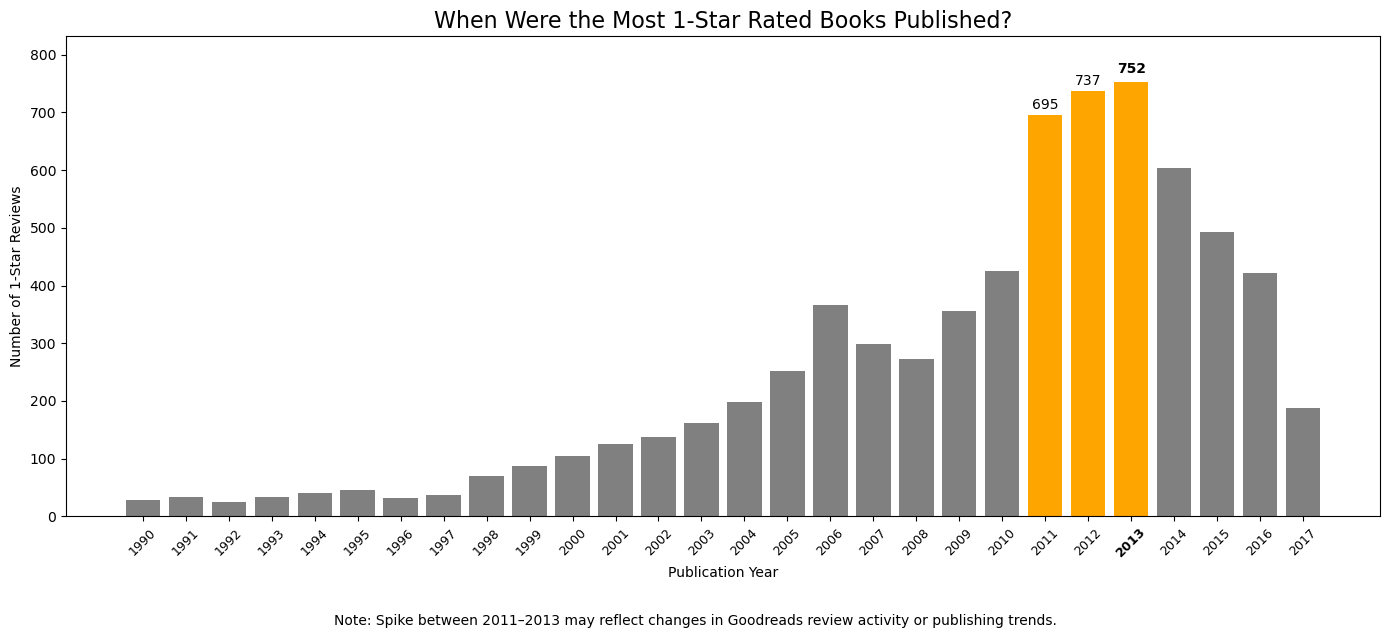

In [38]:
# Get filtered year counts
sample_1star_clean = sample_1star[(sample_1star['publication_year'] >= 1990) & 
                                  (sample_1star['publication_year'] <= 2018)]

# Generate a complete index from 1990–2020 (so every year is shown)
year_range = list(range(1990, 2018))

# Count and reindex to include all years
year_counts = sample_1star_clean['publication_year'].value_counts().sort_index()
year_counts = year_counts.reindex(year_range, fill_value=0)

# --- STEP 2: Plot the Data ---
highlight_years = [2011, 2012, 2013]
colors = ['orange' if year in highlight_years else 'gray' for year in year_counts.index]

fig, ax = plt.subplots(figsize=(14, 6))

bars = ax.bar(year_counts.index, year_counts.values, color=colors)

# Add exact labels for 2011–2013 just above bars (except 2013, which we'll bold separately)
for bar in bars:
    year = int(bar.get_x() + bar.get_width() / 2)
    height = bar.get_height()
    if year in highlight_years and year != 2013:
        ax.text(bar.get_x() + bar.get_width() / 2, height + 5,
                f'{int(height)}', ha='center', va='bottom', fontsize=10)
# Axis settings
ax.set_title("When Were the Most 1-Star Rated Books Published?", fontsize=16)
ax.set_xlabel("Publication Year")
ax.set_ylabel("Number of 1-Star Reviews")
ax.set_xticks(year_range)
# Bold the label for 2013
xtick_labels = []
for year in year_range:
    if year == 2013:
        xtick_labels.append(f'$\\bf{{{year}}}$')  # LaTeX bold
    else:
        xtick_labels.append(str(year))

ax.set_xticklabels(xtick_labels, rotation=45, fontsize=9)

# Highlight 2013 value in bold above the bar
highlight_year = 2013
highlight_value = year_counts[highlight_year]

ax.annotate(f'{highlight_value}',
            xy=(highlight_year, highlight_value),
            xytext=(0, 5),
            textcoords='offset points',
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold')  # Make the label bold

# Add padding above the tallest bar
ax.set_ylim(0, year_counts.max() + 80)

# Add a footnote
plt.figtext(0.5, -0.05,
            "Note: Spike between 2011–2013 may reflect changes in Goodreads review activity or publishing trends.",
            wrap=True, horizontalalignment='center', fontsize=10)

plt.tight_layout()
plt.show()

In [39]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


# A look into review text without ML

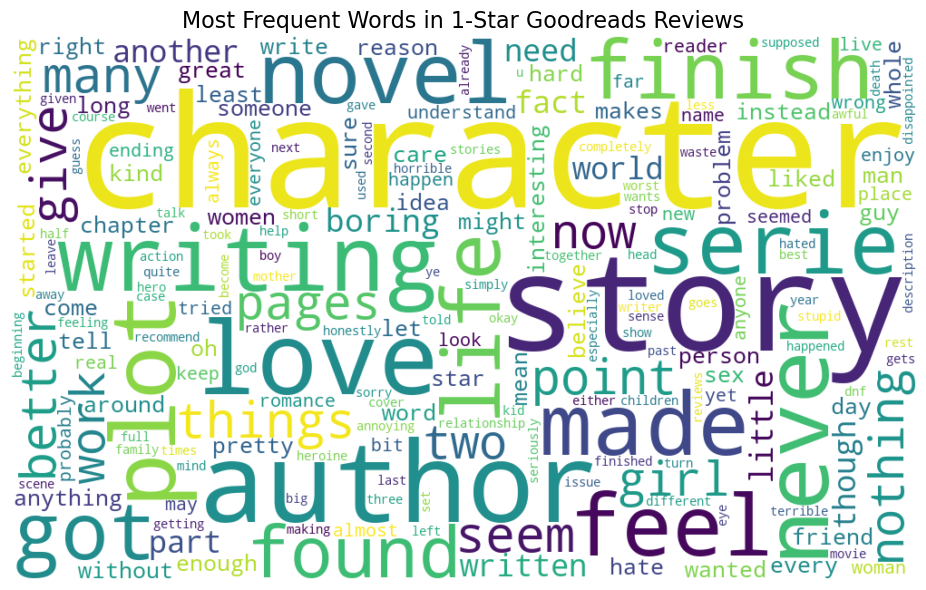

In [41]:
from wordcloud import WordCloud, STOPWORDS

# Combine all review text into one big string
all_reviews = " ".join(review for review in sample_1star['review_clean'].dropna())

# Define stopwords to exclude common words
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([ 'book', 'read', 'one', 'really', 'even', 'get', 'know', 'make', 'thing',
    'think', 'way', 'page', 
     'time','would', 'could', 'like', 'well', 'just', 'books',
    'say', 'thought', 'felt', 'want', 'back', 'reading', 'see', 'go', 'going',
    'take', 'something', 'much', 'still', 'good', 'bad', 'end', 'start',
    'main', 'people', 'done', 'felt', 'lot', 'actually', 'put', 'will', 'first', 'use',
    'maybe', 'find', 'say', 'said', 'try', 'trying', 'readers', 'review'
])  

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white',
                      stopwords=custom_stopwords, max_words=200).generate(all_reviews)

# Plot it
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in 1-Star Goodreads Reviews", fontsize=16)
plt.tight_layout()
plt.show()

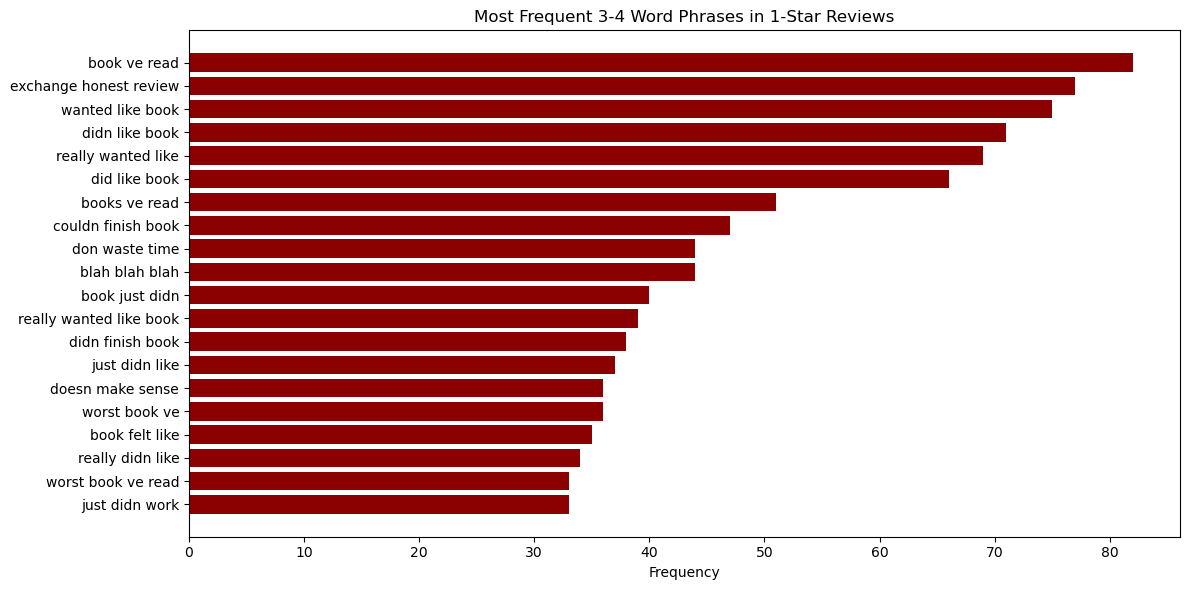

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

# Use bigrams and trigrams
vectorizer = CountVectorizer(ngram_range=(3, 4), stop_words='english', max_features=100)
X = vectorizer.fit_transform(sample_1star['review_clean'].dropna())

# Sum the frequencies
sum_words = X.sum(axis=0)
phrases_freq = [(phrase, sum_words[0, idx]) for phrase, idx in vectorizer.vocabulary_.items()]
phrases_freq = sorted(phrases_freq, key=lambda x: x[1], reverse=True)

# Convert to DataFrame
ngram_df = pd.DataFrame(phrases_freq, columns=['Phrase', 'Frequency'])

# Display top results
plt.figure(figsize=(12,6))
plt.barh(ngram_df['Phrase'][:20][::-1], ngram_df['Frequency'][:20][::-1], color='darkred')
plt.title('Most Frequent 3-4 Word Phrases in 1-Star Reviews')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

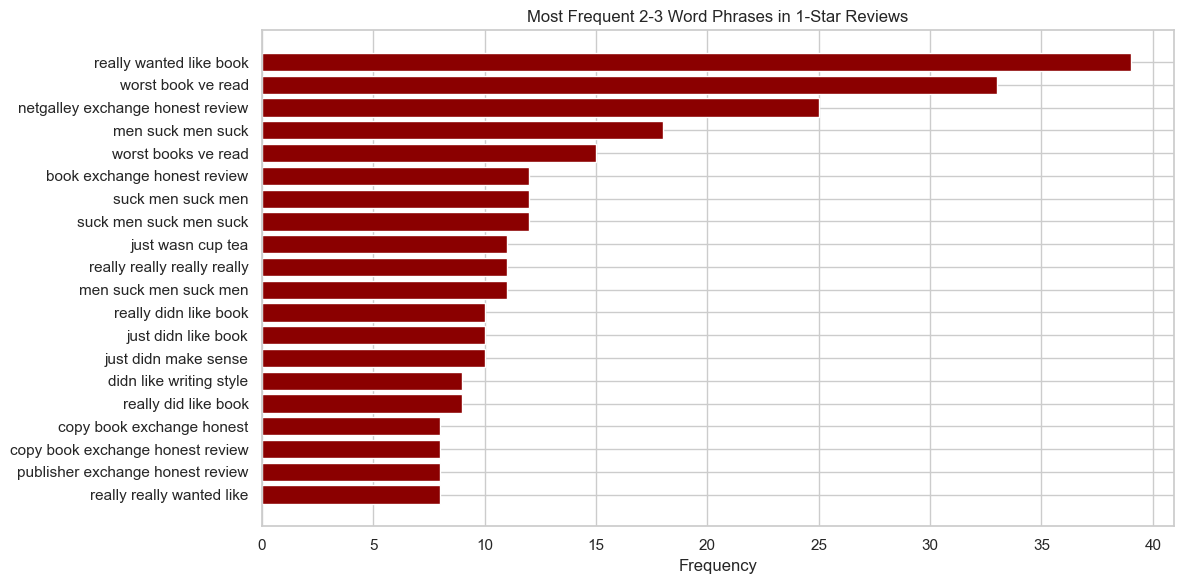

In [145]:
from sklearn.feature_extraction.text import CountVectorizer

# Use bigrams and trigrams
vectorizer2 = CountVectorizer(ngram_range=(4, 5), stop_words='english', max_features=100)
X_2 = vectorizer2.fit_transform(sample_1star['review_clean'].dropna())

# Sum the frequencies
sum_words2 = X_2.sum(axis=0)
phrases_freq2 = [(phrase, sum_words[0, idx]) for phrase, idx in vectorizer2.vocabulary_.items()]
phrases_freq2 = sorted(phrases_freq2, key=lambda x: x[1], reverse=True)

# Convert to DataFrame
ngram2_df = pd.DataFrame(phrases_freq2, columns=['Phrase', 'Frequency'])

# Display top results
plt.figure(figsize=(12,6))
plt.barh(ngram2_df['Phrase'][:20][::-1], ngram2_df['Frequency'][:20][::-1], color='darkred')
plt.title('Most Frequent 2-3 Word Phrases in 1-Star Reviews')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

In [44]:
ngram2_df.head(20)

Phrase  Frequency
0            really wanted like book         39
1                 worst book ve read         33
2   netgalley exchange honest review         25
3                  men suck men suck         18
4                worst books ve read         15
5        book exchange honest review         12
6                  suck men suck men         12
7             suck men suck men suck         12
8                  just wasn cup tea         11
9        really really really really         11
10             men suck men suck men         11
11             really didn like book         10
12               just didn like book         10
13              just didn make sense         10
14           didn like writing style          9
15              really did like book          9
16         copy book exchange honest          8
17  copy book exchange honest review          8
18  publisher exchange honest review          8
19         really really wanted like          8

In [45]:
# Theme mapping dictionary: theme → list of indicative phrases/keywords
complaint_themes = {
    'Character Issues': [
        'main character', 'character development', 'year old', 'immature', 'annoying', 'love interest',
        'unlikable', 'flat character', 'cardboard cutout', 'inconsistent character',
        'poorly developed', 'shallow', 'unlikeable', 'irritating', 'stupid character',
        'weak character', 'flawed character', 'sympathy for', 'no connection with',
        'motivations unclear', 'acted out of character', 'forced relationship',
        'insta-love', 'toxic relationship', 'protagonist', 'antagonist',
        'side character', 'underdeveloped characters', 'one-dimensional',
        'contrived motivations', 'unbelievable actions', 'lack of depth',
        'superficial', 'self-absorbed', 'whiny', 'passive', 'aggressive',
        'jerk', 'bitch', 'mary sue', 'gary stu', 'author insert',
        'wish fulfillment character', 'unearned development',
        'rushed character arc', 'stagnant character', 'rely on stereotypes'
    ],
    'Plot/Structure': [
        'storyline', 'plot', 'spoiler alert', 'twist', 'didn make sense', 'nothing happened',
        'predictable', 'rushed ending', 'slow burn', 'pacing issues', 'convoluted plot',
        'plot holes', 'deus ex machina', 'uneven pacing', 'anticlimactic', 'pointless subplot',
        'disjointed', 'rambling', 'contrived', 'repetitive plot points', 'no resolution',
        'weak plot', 'thin plot', 'overly complicated', 'underdeveloped plot',
        'too much exposition', 'info dump', 'lack of focus', 'meandering',
        'circular narrative', 'incoherent', 'illogical', 'unrealistic plot',
        'convenient coincidences', 'forced conflict', 'lack of stakes',
        'unnecessary scenes', 'padding', 'false climax', 'unsatisfying ending',
        'cliffhanger with no payoff', 'sequel baiting', 'felt incomplete'
    ],
    'Writing Style': [
        'writing style', 'bad writing', 'purple prose', 'repetitive', 'boring', 'poorly written',
        'clunky prose', 'awkward phrasing', 'stilted dialogue', 'unnatural dialogue',
        'telling not showing', 'over descriptive', 'underdeveloped', 'simplistic writing',
        'pretentious writing', 'amateurish', 'grammatical errors', 'typos', 'editing issues',
        'poor sentence structure', 'weak vocabulary', 'monotonous', 'flow issues',
        'choppy', 'dense writing', 'impenetrable', 'overuse of adjectives',
        'clichés', 'hackneyed', 'trite', 'melodramatic', 'overwrought',
        'infodumping through dialogue', 'dialogue felt forced',
        'internal monologue overuse', 'head hopping', 'inconsistent tense'
    ],
    'Engagement': [
        'couldn finish', 'waste time', 'feel like', 'just didn', 'didn like', 'slow', 'dragged',
        'lost interest', 'tedious', 'struggled to get through', 'hard to follow',
        'unengaging', 'dull', 'plodding', 'sleep-inducing', 'wish i hadn read',
        'skimming', 'couldn\'t connect', 'no emotional impact', 'didn care about',
        'wanted it to end', 'a chore to read', 'painful to read', 'eyes glazed over',
        'mind wandered', 'checked page count constantly', 'felt like a slog',
        'momentum stalled', 'pacing was off', 'never invested', 'no suspense',
        'lacked excitement', 'failed to captivate'
    ],
    'Expectations vs Reality': [
        'like book', 'expected', 'thought would', 'overhyped',
        'not what i expected', 'misleading description', 'different from summary',
        'disappointed', 'underwhelming', 'fell flat', 'not as good as', 'wasted potential',
        'false advertising', 'bait and switch', 'promised more than delivered',
        'didn live up to the hype', 'genre wasn\'t what i thought',
        'cover was misleading', 'title was misleading', 'blurb was inaccurate',
        'reviews were misleading', 'fanbase is delusional'
    ],
    'Offensive Content': [
        'offensive', 'problematic', 'sexist', 'racist', 'abuse', 'trigger',
        'misogynistic', 'homophobic', 'ableist', 'culturally insensitive',
        'gory', 'disturbing', 'gratuitous violence', 'sexual assault',
        'animal cruelty', 'hate speech', 'stereotypes', 'colorism', 'fatphobia',
        'victim blaming', 'glorification of violence', 'romanticizing abuse',
        'toxic masculinity', 'white savior trope', 'bury your gays trope',
        'fridging', 'rape as plot device', 'unnecessary graphic detail'
    ],
    'Genre Mismatch': [
        'not romance', 'not fantasy', 'genre', 'more thriller than',
        'felt like', 'marketed as', 'supposed to be', 'wrong genre',
        'elements of', 'blended genres poorly', 'not enough',
        'too much [genre element]', 'this isn\'t [genre]', 'where\'s the',
        'misleading genre tag', 'didn fit the category', 'cross-genre failure',
        'felt like a different genre entirely', 'no present'
    ]
}

In [46]:
def assign_themes(review_text, theme_map):
    review_text = review_text.lower()
    matched_themes = []

    for theme, keywords in theme_map.items():
        if any(kw in review_text for kw in keywords):
            matched_themes.append(theme)

    return matched_themes if matched_themes else ['Uncategorized']

In [47]:
# Apply the theme assignment to your cleaned reviews
sample_1star['complaint_themes'] = sample_1star['review_clean'].apply(
    lambda x: assign_themes(x, complaint_themes)
)

In [48]:
from collections import Counter
from itertools import chain

# Flatten list of themes and count
theme_counts = Counter(chain.from_iterable(sample_1star['complaint_themes']))
print(theme_counts.most_common())

[('Uncategorized', 3791), ('Plot/Structure', 1904), ('Character Issues', 1772), ('Writing Style', 1390), ('Engagement', 1239), ('Genre Mismatch', 768), ('Expectations vs Reality', 673), ('Offensive Content', 475)]


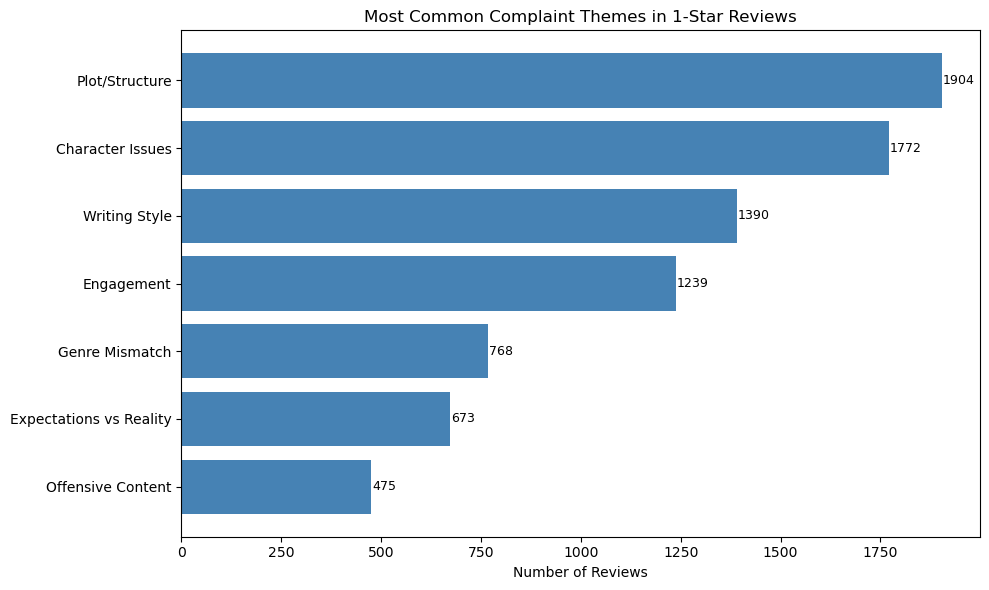

In [49]:
# Step 1: Filter out 'Uncategorized'
filtered_theme_counts = {k: v for k, v in theme_counts.items() if k.lower() != 'uncategorized'}

# Step 2: Sort and split into labels and values
top_themes = sorted(filtered_theme_counts.items(), key=lambda x: x[1], reverse=True)
labels, counts = zip(*top_themes)

# Step 3: Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(labels, counts, color='steelblue')  

plt.xlabel("Number of Reviews")
plt.title("Most Common Complaint Themes in 1-Star Reviews")
plt.gca().invert_yaxis()  # Show most frequent at the top

# Step 4: Add count labels next to bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height() / 2,
             str(count), va='center', fontsize=9)

plt.tight_layout()
plt.show()

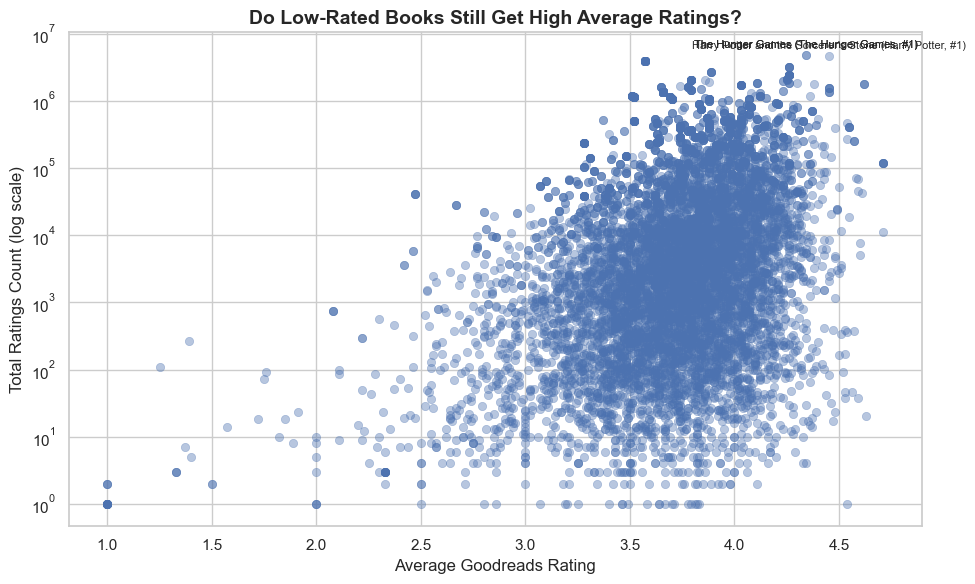

In [50]:
# Set style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Plot with log scale to handle skewed rating counts
sns.scatterplot(
    data=sample_1star,
    x='average_rating',
    y='ratings_count',
    alpha=0.4,
    edgecolor=None
)

# Use log scale for y-axis to reduce skew
plt.yscale('log')

# Add titles and labels
plt.title("Do Low-Rated Books Still Get High Average Ratings?", fontsize=14, fontweight='bold')
plt.xlabel("Average Goodreads Rating", fontsize=12)
plt.ylabel("Total Ratings Count (log scale)", fontsize=12)

# Annotate a few extreme cases (optional)
top_books = sample_1star.nlargest(3, 'ratings_count')
for _, row in top_books.iterrows():
    plt.annotate(row['title'], (row['average_rating'], row['ratings_count']),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

plt.tight_layout()
plt.show()

In [51]:
# Create a new column with the first complaint theme (or 'Uncategorized')
sample_1star['top_theme'] = sample_1star['complaint_themes'].apply(
    lambda x: x[0] if isinstance(x, list) and x else 'Uncategorized'
)

In [52]:
sample_1star.head()

Unnamed: 0   book_id                         review_id  rating  \
0     1546952   7193907  3e2be6da1816bb630e23acd3f28c56d6       1   
1     3605557  22816087  f48e8acd876b66649b097305c7de0d22       1   
2     5308778  14398781  f733fa2faccdd4908ee90437554ded42       1   
3     8889556  12753231  3ecba459e73706bb0cdfbdfe6fc64452       1   
4     6428688  16007164  af80f8a4a1ac0fb2f0dd0a628345dfba       1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       review_text  \
0  I usually like Diana Palmer but this one was a mess. On the occasions that I let myself read romance I go into it fully knowing it's going to be trash and don't expect much. But this one was just badbadbad. Seriously I wanted it to be over! Too much crap going on between CIA spies, halo, medicine, military, and law and it never really fit together. Totally unnecessary. The whole book just felt messy and thrown together. The central relationship was also incredibly rushed and unbelievable. The relationship never really develops and they are discussing marriage after kissing like, twice. \n This pairing was a once bitten twice shy hard ass guy and a virginal abused girl, far too cheesy for my tastes. Thankfully it was short and I read it in one sitting so it wasn't a complete waste of time.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Torture. Pure torture. That is how I describe reading this book. 800 pages that should be 350. A decent to solid story buried in page after page after page after page after page after page of useless and unnecessary information.   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Utterly stupid, glad I didn't pay for it. I skipped to end to see how the shenanagins ended and don't feel I missed a thing by dropping the middle half of the book.   
3                                                                                                                                                        I listened to this on audiobook. First of all the narrator was sooo monotone and boring. Secondly the actual book was boring. The first third of the book was so slow it was almost stagnant after the bus crashed 

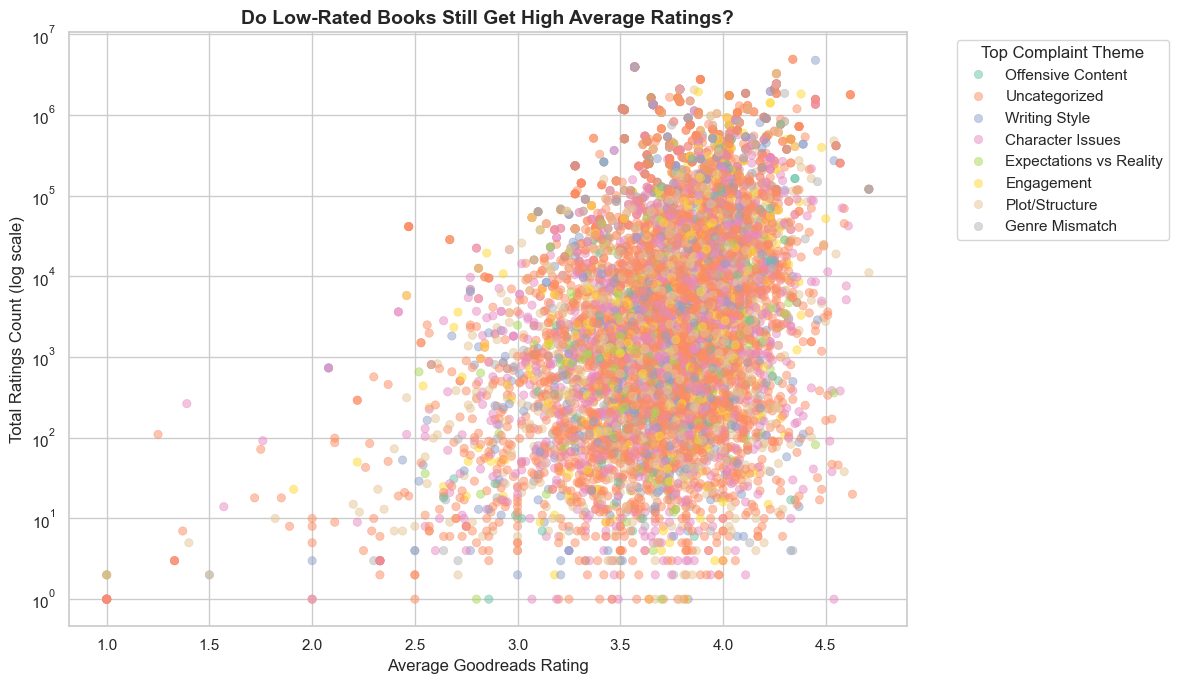

In [53]:
plt.figure(figsize=(12, 7))

sns.scatterplot(
    data=sample_1star,
    x='average_rating',
    y='ratings_count',
    hue='top_theme',       # now a string, not a list
    palette='Set2',
    alpha=0.5,
    edgecolor=None
)

plt.yscale('log')
plt.title("Do Low-Rated Books Still Get High Average Ratings?", fontsize=14, fontweight='bold')
plt.xlabel("Average Goodreads Rating")
plt.ylabel("Total Ratings Count (log scale)")
plt.legend(title="Top Complaint Theme", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# A look into review text with ML

In [55]:
#okay I do want to go futher with k clustering and training a machine to map review to catergory type but ill do that later

In [56]:
import tensorflow as tf
import keybert
import gensim

In [57]:
pip install tf-keras

Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install transformers==4.41.2

Note: you may need to restart the kernel to use updated packages.


In [62]:
from keybert import KeyBERT
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Load KeyBERT model
try:
    kw_model = KeyBERT(model='all-mpnet-base-v2')
except Exception as e:
    print(f"Error loading large model: {e}")
    print("Falling back to smaller model...")
    kw_model = KeyBERT(model='paraphrase-MiniLM-L12-v2')

def extract_keywords_in_batches(docs, batch_size=250, top_n=8):
    all_keywords = []
    for i in range(0, len(docs), batch_size):
        batch = docs[i:i+batch_size]
        keywords = kw_model.extract_keywords(
            batch,
            keyphrase_ngram_range=(1, 4),
            stop_words="english",
            top_n=top_n,
            use_mmr=True
        )
        print(f"Batch {i}-{i+len(batch)} keywords: {keywords}") # Debug print
        all_keywords.extend(keywords)
    return all_keywords

# Drop NaNs or empty strings from reviews
df_clean = sample_1star[sample_1star['review_clean'].notna() & sample_1star['review_clean'].str.strip().ne("")].copy()
# Reset index to make batch slicing easier
df_clean = df_clean.reset_index(drop=True)

# Extract keywords in batches
all_keywords = extract_keywords_in_batches(df_clean['review_clean'].tolist(), top_n=5)
print(f"Length of all_keywords: {len(all_keywords)}") # Debug print
print(f"Length of df_clean index: {len(df_clean)}")   # Debug print

# Add keywords back to the DataFrame
df_clean['review_keywords'] = [
    ', '.join([kw for kw, score in kws]) for kws in all_keywords
]

Batch 0-250 keywords: [[('diana palmer mess', 0.5381), ('read romance fully knowing', 0.4481), ('cia spies halo', 0.3662), ('totally unnecessary book', 0.3238), ('far cheesy tastes thankfully', 0.2227)], [('torture reading book 800', 0.778), ('pure torture reading book', 0.7559), ('torture pure torture', 0.4793), ('350 decent solid story', 0.3386), ('page page useless unnecessary', 0.2793)], [('skipped end shenanagins ended', 0.4993), ('half book', 0.4359), ('utterly stupid', 0.3316), ('glad didn pay', 0.2868), ('thing dropping', 0.0783)], [('book basically just stopped', 0.5982), ('trapped kids election', 0.4291), ('bus crashed greenway kept', 0.4268), ('listening wanted', 0.0932), ('charge excitement', 0.0417)], [], [('book left angry lee', 0.5414), ('review xd', 0.3279), ('robotic dull frustrating romance', 0.3171), ('shiba picture says', 0.2957), ('achingly awful', 0.2862)], [('book mira', 0.5827), ('honest opinionreview begin review', 0.4571), ('poorly developed book good', 0.4565

In [63]:
# Flatten the keyword list into strings
keyword_strings = [', '.join([kw for kw, score in kws]) for kws in all_keywords]
df_keywords = pd.DataFrame({'keywords': keyword_strings})
df_keywords.to_csv("all_keywords.csv", index=False)

In [64]:
# Print first 10 keyword lists
for i, kws in enumerate(all_keywords[:10]):
    print(f"Review {i+1} Keywords:")
    for kw, score in kws:
        print(f"  - {kw} (score: {round(score, 3)})")
    print()

Review 1 Keywords:
  - diana palmer mess (score: 0.538)
  - read romance fully knowing (score: 0.448)
  - cia spies halo (score: 0.366)
  - totally unnecessary book (score: 0.324)
  - far cheesy tastes thankfully (score: 0.223)

Review 2 Keywords:
  - torture reading book 800 (score: 0.778)
  - pure torture reading book (score: 0.756)
  - torture pure torture (score: 0.479)
  - 350 decent solid story (score: 0.339)
  - page page useless unnecessary (score: 0.279)

Review 3 Keywords:
  - skipped end shenanagins ended (score: 0.499)
  - half book (score: 0.436)
  - utterly stupid (score: 0.332)
  - glad didn pay (score: 0.287)
  - thing dropping (score: 0.078)

Review 4 Keywords:
  - book basically just stopped (score: 0.598)
  - trapped kids election (score: 0.429)
  - bus crashed greenway kept (score: 0.427)
  - listening wanted (score: 0.093)
  - charge excitement (score: 0.042)

Review 5 Keywords:

Review 6 Keywords:
  - book left angry lee (score: 0.541)
  - review xd (score: 0.328)

In [65]:
#Convert Keywords to Embeddings
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')  # Or your preferred model
embeddings = model.encode(df_clean['review_keywords'].tolist(), show_progress_bar=True)


Batches:   0%|          | 0/266 [00:00<?, ?it/s]

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
reduced_embeddings = pca.fit_transform(embeddings)

In [67]:
pip install umap-learn hdbscan

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [68]:
#Use a clustering algorithm to group similar themes:
import umap
import hdbscan

# Reduce to 5D for clustering
umap_model = umap.UMAP(n_components=5, random_state=42)
umap_embeddings = umap_model.fit_transform(embeddings)

# Cluster
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, prediction_data=True)
labels = clusterer.fit_predict(umap_embeddings)

df_clean['theme_cluster'] = labels

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [69]:
import numpy as np
print(np.__version__)

1.26.4


In [70]:
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3]), array([  11,   95,   22,  171, 8196]))

In [71]:
for label in sorted(set(labels)):
    print(f"\n--- Cluster {label} ---")
    display(df_clean[df_clean['theme_cluster'] == label][['review_clean', 'review_keywords']].sample(3))


--- Cluster -1 ---


review_clean  \
2996  dnf at 54 i really tried to stick it out, but there is no backstory whatsoever, no reason for their petty squabbles all the time, no reason for the stupid panic attacks. and their 'relationship' progresses like to 14-year-olds who are about to feel each other up for the first time, including the awkward, childish, over-the-top cheesy conversations.   
6840                                                                                                                               not quite what i expected to be honest. i didn't understand the insta-love between these two followed by the borderline depression then maybe some mutual obsession. all i could think was how unhealthy these two were together.   
4549                                                                                                                                                                                                                                                                                                 i found this story ok, nothing new happened here. only lot sex.   

                                                                                                           review_keywords  
2996      relationship progresses, stupid panic attacks relationship, petty squabbles, dnf 54 really tried, olds feel time  
6840  love followed borderline depression, mutual obsession, quite expected honest didn, understand insta, think unhealthy  
4549                                  new happened lot sex, story ok new happened, ok new happened, story ok, happened lot


--- Cluster 0 ---


review_clean review_keywords
900                       horrible                
2206   i'm just not that into you.                
2011  struggled to get through it.


--- Cluster 1 ---


review_clean  \
3143                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 i had high hopes for this one based on a very nice cover not the one featured here and strong premise. but in reality this is very much a ya offering with a dash of romance which is very much what i was not looking for. now i have blundered into some ya stuff and very much enjoyed it hunger games etc but this one really didn't work for me. the idea of a young assassin being dragged out of slavery to fight in a contest worked well as did the introduction of historical evil and menace. there was some real potential here that is wasted on an irritating lead character. the author gives us far too much detail on her fancy dresses and simpering in front of the two main males. the interesting stuff the king, the bigger picture etc is not really delivered and nor is a true ability as an assassin, we end up in the middle ground of a story that keeps suggesting it is about to get interesting and then.....doesn't. a shame, this could have been very good.   
4238  i had very high expectations for this book. anyone else who expected to be completely blown away, put this book down on the shelf and run, run very far away, and pretend the series ended it as you would have liked it to. i found no redeeming qualities in this book, so here are the negatives... katniss herself. remeber that kickass heroine from the hunger games? yeah...now katniss everdeen is a puppet, a mindless sponge! there were no good scenes throughtout the entire book, no amazing action scenes with katniss doing what she does best. instead, the whole time they just shoot propos with katniss having random spurts of energy and shooting down a plane or two. and when she finally gets off her butt and does something in the end, it was horrible. a mish-mash of random occurences. this isn't the katniss everdeen everyone came to love. this is a spineless and brainless replacement! i have to hand it to collins, though. she has the imagination of a 5-year-old. think of the most riciulous things that could attack katniss and you have her obstacles. i know this is a sci-fi, futuristic setting, but really? collins is suddenly bringing a gregor the overlander feel into the hunger games. it was just a huge mistake. about 97 of this book was about peeta. i'm a gale fan, so maybe that's why i didn't like it. the main gist of it was this oh peeta i love you!, i have to let peeta go because he's not the peeta i used to love, peeta i can't go on without you! she was running in circles and it was sickening! instead of her messed up love triangle, collins should have brought more action and rebellion, and created a more exciting read. and the ending...be prepared to lose some of your favorite characters for seemingly no


--- Cluster 2 ---


review_clean  \
8307                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             i honestly lost interest after red rising. don't recommend the audiobook for this series, as it gets pretty confusing dnf at 11   
5348  dnf at 52 my opinion and why it did not work for me. it may work for you. this could have been so great, but it was not for me. first there were too many conversations between the heroine, andi, and her bff, gina. i felt like for the first 22re were more scenes with gina and andi then andi and bentley. then any scenes there were with bentley were shortly followed by gina where andi repeated what she and bentley just did and talked about. there was already enough inner dialogue that i did not need every situation repeated three times. it was repeated three times by reading the actual event happening, the character thinking about it with inner dialogue, and then andi repeating it to gina. another issue, the hero was too wishy washy. so much so that the brother had to convince him to go after the heroine, which the hero did not just was happy to accept another job position away from nyc. there is a misunderstanding and andi tells the hero she does not want to see him and he is like "okay, goodbye." so the hero does not fight for the heroine to understand the situation correctly. instead the brother has to convince andi that bentley cares. i hate wishy washy heroes. what made it worse was reading bentley's pov and just seeing how quickly he gives up. at first i thought he was this strong guy who will take a challenge and fight for love, but at 49, he was the opposite.   
1946                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    


--- Cluster 3 ---


review_clean  \
6463  spoiler alert  this reviewer has not read the previous books. it may contain "spoilers". how this author went from her sweet home series to this ott dark, violent, teeming with physicalsexual abuse series really surprises this netgalley reviewer. i have to admit i was first repulsed and stunned, at only 7 into it, when the hero was drugged via his custom made futuristic dog collar that injected meds into his neck that forced him to have unwanted, graphic violent sex with his female masterhandler, which apparently is a common, scheduled occurrence. she also uses it to put him in a murderous rage, so he will kill on command. yeah, the author had me seriously questioning what book i had stumbled into, folks. as you've probably guessed, i have not read previous books in this series. even at almost 30, it was still far too focused on dishing out abuse, in one form or another, for my taste. when a big block of time was spent with the hero, valentin, dubbed 194, despicably, heartlessly, depravedly abusing the heroine trying to get her to confess how she was connected to zaal costava, i started to wonder why this was considered a romantic read. btw, no way was this gal giving up the ghost though. she'd do anything, including dying, to protect zaal, her brother, especially since she just recently found out he was still alive. oddly enough that's when the first tiny spark of "there's more behind the maskscarred face" of her abductor that ignited in the heroine's heart. she started to see him as an extension of her likely similar tortured brother since she suspected they both had been molded into their current state by the same evil one, the jakhur. when the predictable, non-consensual touching her naked body and doing smexy things to her to get her to talk started, i was inwardly shouting, "now wait just a dang minute!" you see, for a virgin who's been stripped bare, doused with freezing cold waterthen subjected to unbearably hot temps, repeatedly, logically there is no way she would start to enjoy any smexy moments with this guy. don't you agree? no, it would have been more realistic to have her mentally giving him the middle finger and defiantly staring him down or just crying her eyes out. turning into lusty putty in his hands just would never have happened, folks. sure, i read the synopsis. so what was i expecting? honestly, it was the mention of mafia that lured me in to give this book a chance. i'm an avid mafia romance reader, my friends. i'm used to dark, bad boys finding redemption. i just need to enjoy the journey getting there though. it wasn't until around 35, the plot to get this story rolling forward finally kicked in, until it kept getting interrupted with more unlikely smexy moments. with their true confessions of admitting to one another they had just shared their first ever kiss, instead of feeling mushy over it, because, really, it wasn't a snow white romantic kind of scenario, the guy's been violatingtorturing her against her will for days now, i found myself thinking, "how about sharing a shirt with the lovely lady, buddy? you've kept her naked as a jail bird for long enough! show some loving by giving her some clothes instead!" then at 45, we are back to vivid flashbacks of more disturbing details of the hero and his sister's abduction by the night wraiths. that's when i decided i was d-o-n-e, folks. i'm not a fan of child abuse ever being used to promote a storyline. knowing his baby sister has been druggedraped repeatedly this past 18 years, with him at times being forced to watch via a closed monitor, i just can't stomach any more details. throw on top of the fact, almost half-way through, we can easily predict there is still going to be more darkness than light before this couple gets their hea. for me, it's just not going to be worth the agony of the literary journey filled with more depressing dramaabuseviolence. if you are a fan of this series, you likely won't be shocked and will even 

In [181]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# === FIXED: Download the correct NLTK resources ===
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# === Load your data ===
# texts = sample_1star['review_clean'].dropna().tolist()  # Uncomment this for your real data
texts = [  # Placeholder example
    "This book had too much romance and not enough plot.",
    "I love the characters but the ending was disappointing.",
    "Great ideas, poor execution.",
    "Not for me. The pace was too slow and I didn’t connect with the story."
]

# === 1. Tokenize, clean, and lemmatize ===
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text.lower())
    return [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]

tokenized = [preprocess(text) for text in texts]

# === 2. Gensim corpus for coherence ===
dictionary = Dictionary(tokenized)
corpus = [dictionary.doc2bow(text) for text in tokenized]

# === 3. Vectorize ===
joined_texts = [" ".join(tokens) for tokens in tokenized]
#count_vectorizer = CountVectorizer(max_df=0.95, min_df=2)
#tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
count_vectorizer = CountVectorizer(max_df=1.0, min_df=1)
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1)

count_data = count_vectorizer.fit_transform(joined_texts)
tfidf_data = tfidf_vectorizer.fit_transform(joined_texts)

# === 4. Fit LDA and NMF models ===
for num_topics in range(5, 21):
    model = NMF(n_components=num_topics, random_state=42)
    model.fit(tfidf_data)
    
    coherence = get_coherence_score(
        model,
        tfidf_vectorizer.get_feature_names_out(),
        tokenized,
        dictionary  # 🧠 this was missing
    )
    print(f"NMF Coherence (topics={num_topics}): {coherence:.4f}")
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
nmf_model = NMF(n_components=num_topics, random_state=42)

lda_model.fit(count_data)
nmf_model.fit(tfidf_data)

# === 5. Compute coherence scores ===
def get_coherence_score(model, feature_names, tokenized_texts, dictionary, top_n=10):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-top_n - 1:-1]]
        topics.append(top_words)
    coherence_model = CoherenceModel(topics=topics, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

lda_coherence = get_coherence_score(lda_model, count_vectorizer.get_feature_names_out(), tokenized, dictionary)
nmf_coherence = get_coherence_score(nmf_model, tfidf_vectorizer.get_feature_names_out(), tokenized, dictionary)
lda_perplexity = lda_model.perplexity(count_data)

# === 6. Print Results ===
print(f"LDA Coherence: {lda_coherence:.4f}")
print(f"LDA Perplexity: {lda_perplexity:.4f}")
print(f"NMF Coherence: {nmf_coherence:.4f}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/michaelajackson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/michaelajackson/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michaelajackson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork i

NMF Coherence (topics=5): 0.3998


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

NMF Coherence (topics=6): 0.4012


/opt/anaconda3/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:135: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(res * 2)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid u

NMF Coherence (topics=7): 0.3942


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

NMF Coherence (topics=8): 0.4044


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

NMF Coherence (topics=9): 0.4035


/opt/anaconda3/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:135: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(res * 2)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid u

NMF Coherence (topics=10): 0.3942


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

NMF Coherence (topics=11): 0.4044


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

NMF Coherence (topics=12): 0.4052


/opt/anaconda3/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:135: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(res * 2)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid u

NMF Coherence (topics=13): 0.4044


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

NMF Coherence (topics=14): 0.4037


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

NMF Coherence (topics=15): 0.4012


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

NMF Coherence (topics=16): 0.4030


/opt/anaconda3/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:135: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(res * 2)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid u

NMF Coherence (topics=17): 0.4024


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

NMF Coherence (topics=18): 0.3992


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

NMF Coherence (topics=19): 0.4009


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

NMF Coherence (topics=20): 0.3953


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

LDA Coherence: 0.2705
LDA Perplexity: 160.7836
NMF Coherence: 0.3953


In [185]:
def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

print("LDA Top Words:")
print_top_words(lda_model, count_vectorizer.get_feature_names_out())

print("NMF Top Words:")
print_top_words(nmf_model, tfidf_vectorizer.get_feature_names_out())

LDA Top Words:
Topic #0:
story much connect enough slow book pace plot romance love
Topic #1:
story much connect enough slow book pace plot romance love
Topic #2:
idea great poor execution character connect disappointing ending enough story
Topic #3:
story much connect enough slow book pace plot romance love
Topic #4:
story much connect enough slow book pace plot romance love
Topic #5:
story much connect enough slow book pace plot romance love
Topic #6:
story much connect enough slow book pace plot romance love
Topic #7:
story much connect enough slow book pace plot romance love
Topic #8:
story much connect enough slow book pace plot romance love
Topic #9:
story much connect enough slow book pace plot romance love
Topic #10:
story much connect enough slow book pace plot romance love
Topic #11:
story much connect enough slow book pace plot romance love
Topic #12:
story much connect enough slow book pace plot romance love
Topic #13:
book romance plot enough much slow connect story pace l

In [173]:
pip install bertopic

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 1.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [199]:
pip install bertopic[auto]

zsh:1: no matches found: bertopic[auto]
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [197]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import pandas as pd
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.representation import KeyBERTInspired
from bertopic.reduction import AutoReduce

# Download necessary NLTK resources (if you haven't already)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Step 1: Prepare your texts with punctuation removal
texts = sample_1star['review_clean'].dropna().tolist()

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

cleaned_texts = [remove_punctuation(text) for text in texts]

# Step 2: Generate Embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(cleaned_texts, show_progress_bar=True)

# Step 3: Fit BERTopic model with AutoReduce
representation_model = KeyBERTInspired()
topic_model = BERTopic(
    representation_model=representation_model,
    language="english",
    calculate_probabilities=True,
    verbose=True # To see the reduction process
)
topics, probs = topic_model.fit_transform(cleaned_texts, embeddings)

# Step 4: Automatically reduce the number of topics
auto_reduce_model = AutoReduce(nr_topics="auto", verbose=True)
new_topics, new_probs = auto_reduce_model.fit_transform(topics, embeddings)
topic_model.update_topics(new_topics, new_probs)

# Step 5: Evaluate Topics using BERTopic's visualization tools

# 5.1: Visualize Topics (Intertopic Distance Map)
topic_model.visualize_topics()

# 5.2: Visualize Topic Hierarchy (if you want to explore merging)
topic_model.visualize_hierarchy()

# 5.3: Visualize Topic Words (Bar Chart of top words per topic)
topic_model.visualize_barchart()

# 5.4: Visualize Documents (Distribution of documents across topics)
topic_model.visualize_documents(cleaned_texts, embeddings)

# Step 6: Get Topic Information (for tabular view)
topic_info = topic_model.get_topic_info()
print("\nTopic Information:")
print(topic_info.head(15))

# Optional: Get the representative documents for each topic
# representative_docs = topic_model.get_representative_docs()
# print("\nRepresentative Documents:")
# for topic, docs in representative_docs.items():
#     print(f"Topic {topic}: {docs[:3]}")

ModuleNotFoundError: No module named 'bertopic.reduction'

# A look into shelves

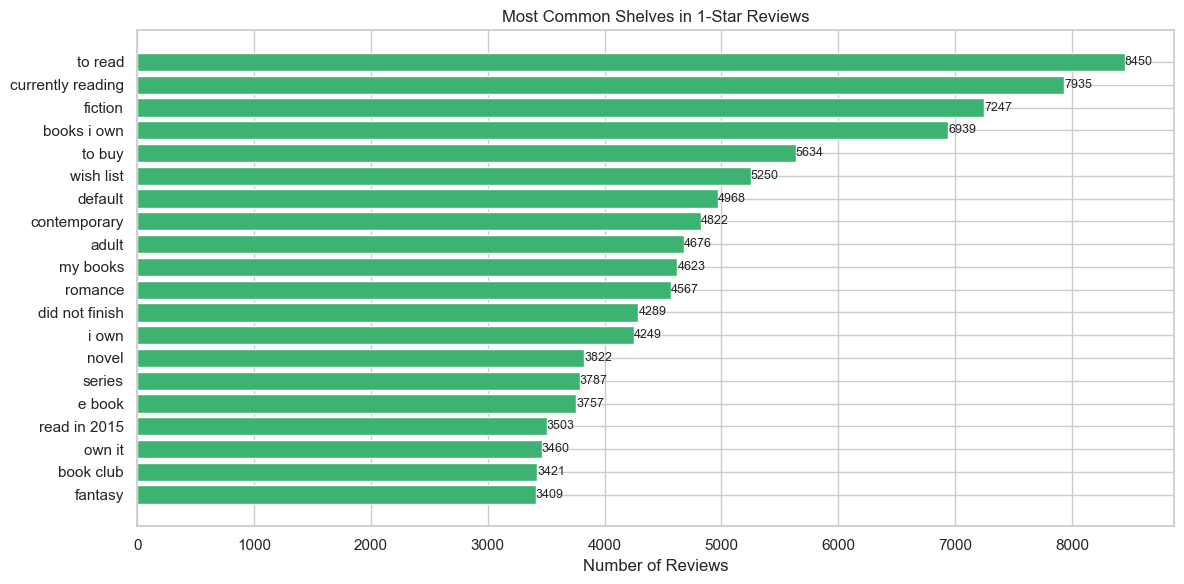

In [75]:
# Flatten and count
shelf_counts = Counter(chain.from_iterable(
    [shelf for shelf, _ in row] for row in sample_1star['cleaned_shelves']
))

# Get top N shelves
top_shelves = shelf_counts.most_common(20)
shelf_names, counts = zip(*top_shelves)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.barh(shelf_names, counts, color='mediumseagreen')
plt.xlabel("Number of Reviews")
plt.title("Most Common Shelves in 1-Star Reviews")
plt.gca().invert_yaxis()

# Add labels
for bar, count in zip(bars, counts):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             str(count), va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [76]:
print(top_shelves)

[('to read', 8450), ('currently reading', 7935), ('fiction', 7247), ('books i own', 6939), ('to buy', 5634), ('wish list', 5250), ('default', 4968), ('contemporary', 4822), ('adult', 4676), ('my books', 4623), ('romance', 4567), ('did not finish', 4289), ('i own', 4249), ('novel', 3822), ('series', 3787), ('e book', 3757), ('read in 2015', 3503), ('own it', 3460), ('book club', 3421), ('fantasy', 3409)]


You’re training a model to map messy shelf labels (inputs) to clean genre categories (targets).

You could even combine rule-based + machine-learning predictions:
	•	Use your manual genre_mapping when available.
	•	Use the model when the shelf isn’t in your mapping.

# A look into book description

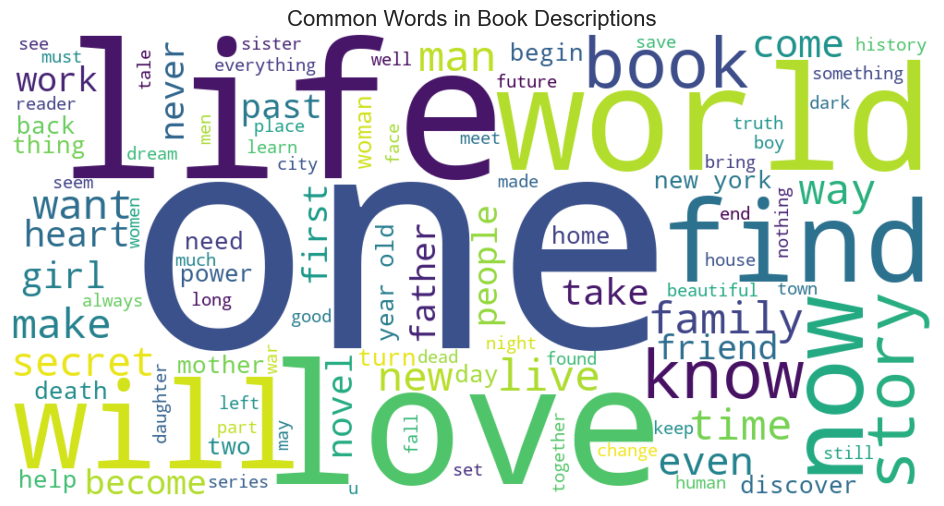

In [80]:
# Combine all descriptions
all_descriptions = ' '.join(sample_1star['description_clean'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white',
                      max_words=100, colormap='viridis').generate(all_descriptions)

# Display it
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Book Descriptions', fontsize=16)
plt.show()

## sentiment analysis

In [82]:
pip install textblob

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [83]:
from textblob import TextBlob

In [84]:
def get_sentiment(text):
    if pd.isnull(text) or not isinstance(text, str) or text.strip() == "":
        return None
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Returns a float from -1 (negative) to 1 (positive)

In [85]:
sample_1star['desc_sentiment'] = sample_1star['description_clean'].apply(get_sentiment)
sample_1star['review_sentiment'] = sample_1star['review_clean'].apply(get_sentiment)

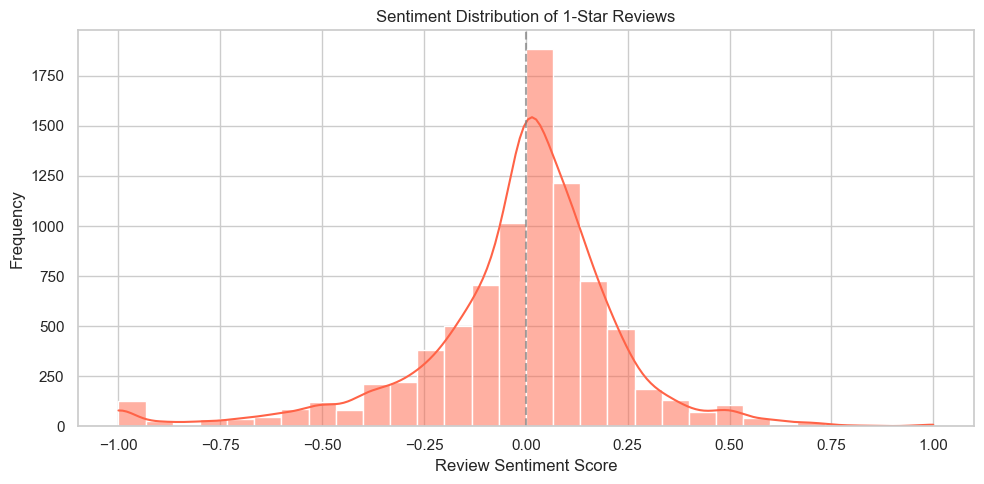

In [86]:
plt.figure(figsize=(10, 5))
sns.histplot(sample_1star['review_sentiment'], bins=30, kde=True, color='tomato')
plt.title("Sentiment Distribution of 1-Star Reviews")
plt.xlabel("Review Sentiment Score")
plt.ylabel("Frequency")
plt.axvline(0, linestyle='--', color='gray', alpha=0.7)
plt.tight_layout()
plt.show()

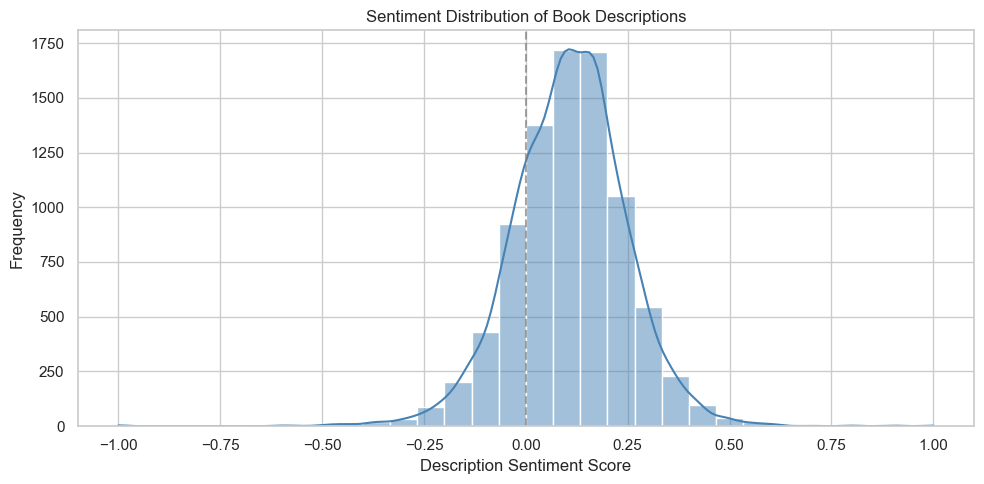

In [87]:
plt.figure(figsize=(10, 5))
sns.histplot(sample_1star['desc_sentiment'], bins=30, kde=True, color='steelblue')
plt.title("Sentiment Distribution of Book Descriptions")
plt.xlabel("Description Sentiment Score")
plt.ylabel("Frequency")
plt.axvline(0, linestyle='--', color='gray', alpha=0.7)
plt.tight_layout()
plt.show()

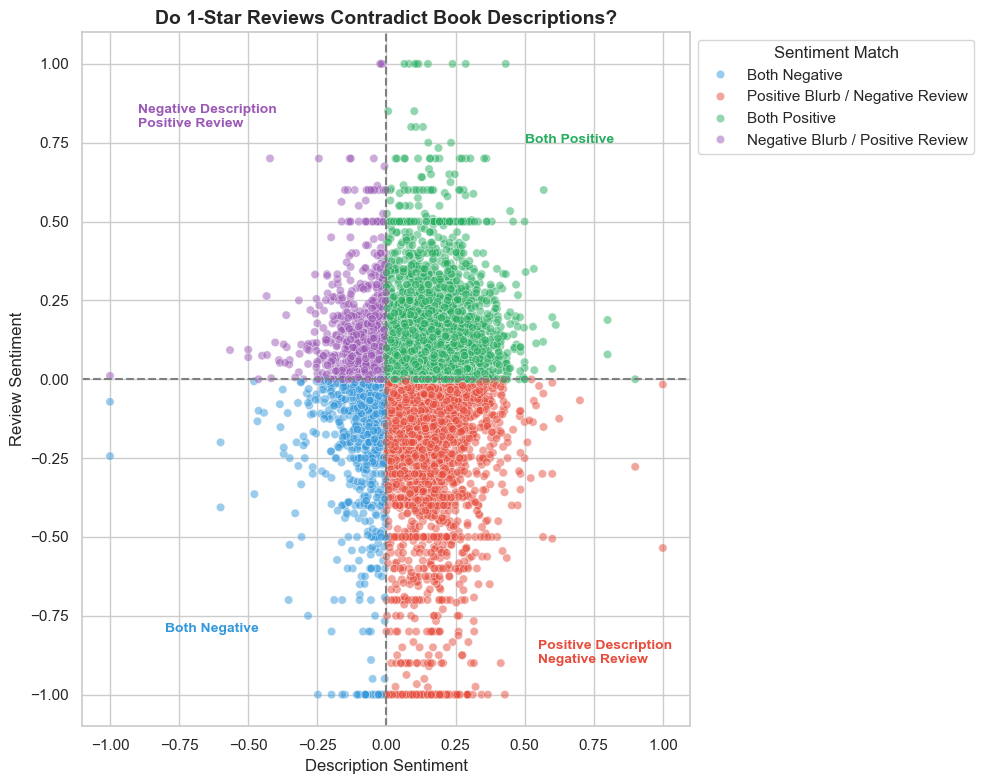

In [88]:
# Define sentiment agreement/contradiction
def sentiment_relationship(row):
    if row['desc_sentiment'] >= 0 and row['review_sentiment'] < 0:
        return 'Positive Blurb / Negative Review'
    elif row['desc_sentiment'] < 0 and row['review_sentiment'] >= 0:
        return 'Negative Blurb / Positive Review'
    elif row['desc_sentiment'] >= 0 and row['review_sentiment'] >= 0:
        return 'Both Positive'
    else:
        return 'Both Negative'

# Apply this relationship to the DataFrame
sample_1star['sentiment_relation'] = sample_1star.apply(sentiment_relationship, axis=1)

# Set up the plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=sample_1star,
    x='desc_sentiment',
    y='review_sentiment',
    hue='sentiment_relation',
    alpha=0.5,
    palette={
        'Positive Blurb / Negative Review': '#e74c3c',
        'Negative Blurb / Positive Review': '#9b59b6',
        'Both Positive': '#27ae60',
        'Both Negative': '#3498db'
    }
)

# Add vertical and horizontal lines at zero
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# Annotations for quadrants
plt.text(0.55, -0.9, 'Positive Description\nNegative Review', color='#e74c3c', fontsize=10, weight='bold')
plt.text(-0.9, 0.8, 'Negative Description\nPositive Review', color='#9b59b6', fontsize=10, weight='bold')
plt.text(0.5, 0.75, 'Both Positive', color='#27ae60', fontsize=10, weight='bold')
plt.text(-0.8, -0.8, 'Both Negative', color='#3498db', fontsize=10, weight='bold')

# Labels and title
plt.xlabel("Description Sentiment", fontsize=12)
plt.ylabel("Review Sentiment", fontsize=12)
plt.title("Do 1-Star Reviews Contradict Book Descriptions?", fontsize=14, weight='bold')
plt.legend(title='Sentiment Match', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

In [89]:
# Define as a contradiction if description is positive but review is strongly negative
sample_1star['contradiction'] = sample_1star.apply(
    lambda row: row['desc_sentiment'] > 0.2 and row['review_sentiment'] < -0.2,
    axis=1
)

# Show proportion and example titles
contradict_pct = sample_1star['contradiction'].mean() * 100
print(f"{contradict_pct:.2f}% of 1-star reviews contradict the description's positive tone")

# Optionally preview top contradicting cases
sample_1star[sample_1star['contradiction'] == True][['title', 'desc_sentiment', 'review_sentiment']].head()

3.56% of 1-star reviews contradict the description's positive tone


title  desc_sentiment  review_sentiment
35            Her Best Friend's Dad        0.213690         -1.000000
52   Oryx and Crake (MaddAddam, #1)        0.388333         -0.203846
71           10 Little Sock Monkeys        0.242190         -0.300000
90                    After The End        0.214141         -0.500000
131                            Room        0.228704         -0.383333

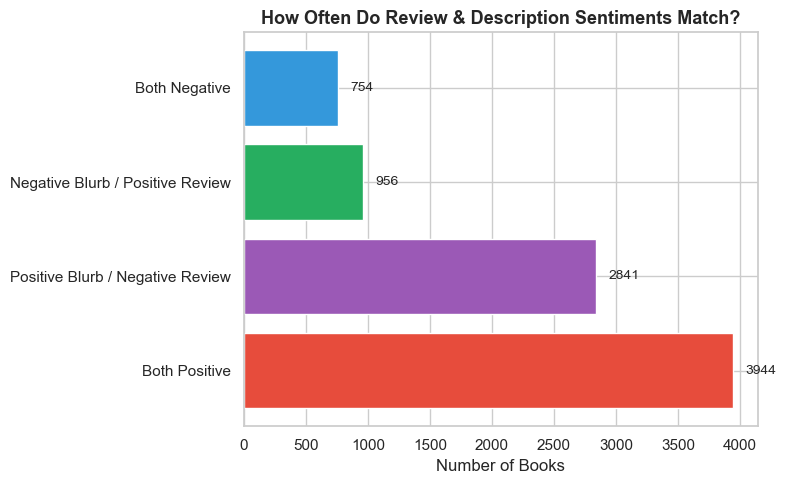

In [90]:
# Count the number of books per sentiment relationship
sentiment_counts = sample_1star['sentiment_relation'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment Relationship', 'Count']

# Plotting the bar chart
plt.figure(figsize=(8, 5))
bars = plt.barh(
    sentiment_counts['Sentiment Relationship'],
    sentiment_counts['Count'],
    color=['#e74c3c', '#9b59b6', '#27ae60', '#3498db']
)

# Add count labels next to bars
for bar in bars:
    plt.text(
        bar.get_width() + 100,
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width())}",
        va='center',
        fontsize=10
    )

# Title and labels
plt.xlabel("Number of Books")
plt.title("How Often Do Review & Description Sentiments Match?", fontsize=13, weight='bold')
plt.tight_layout()
plt.show()